In [897]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Кластеризация данных

In [898]:
data = pd.read_csv('population.txt', sep='\t', encoding="cp1251")
data.head()

,Регион,Численность населения (тыс. чел.),Удельный вес городского населения %,Изменение численности населения,Число родившихся на 1000 населения.,Число умерших на 1000 .,Среднегодовая численность населения занятых в экономике (тыс. чел.),Среднедушевые денежные доходы (руб./мес.)
0,Республика Карелия,766,"74,1","-0,8","7,9","15,1","331,5","1673,4"
1,Республика Коми,1135,"74,2","-1,3","8,5","10,7","495,3","1654,4"
2,Архангельская область,1460,"74,4","-1,3","8,1","15,1","587,8",2058
3,Ненецкий АО,46,"59,2","-0,6","11,2","9,4","20,7","1268,8"
4,Вологодская область,1324,"68,4","-0,7","7,9","15,8","598,4","1692,1"


In [899]:
data.dtypes

Регион                                                                  object
Численность населения (тыс. чел.)                                        int64
Удельный вес городского населения %                                     object
Изменение численности населения                                         object
Число родившихся на 1000 населения.                                     object
Число умерших на 1000 .                                                 object
Среднегодовая численность населения занятых в экономике  (тыс. чел.)    object
Среднедушевые денежные доходы (руб./мес.)                               object
dtype: object

In [900]:
print(data['Число родившихся на 1000 населения.'].unique())
print(data['Число умерших на 1000 .'].unique())

['7,9' '8,5' '8,1' '11,2' '7,6' '6,2' '6,5' '7,2' '7' '7,7' '7,1' '6,6'
 '7,8' '6,8' '7,3' '8,7' '7,5' '8,9' '7,4' '11,4' '9,3' '9,4' '8,6' '17,9'
 '16,4' '0' '11,6' '10,4' '10,8' '10' '9,7' '9' '9,1' '8' '8,4' '13,4'
 '8,3' '8,2' '10,3' '12,2' '11' '15,7' '14' '10,9' '14,7' '13' '9,2'
 '10,7']
['15,1' '10,7' '9,4' '15,8' '10,1' '15,4' '17,8' '19,1' '21,4' '17,3'
 '17,9' '20,3' '14,8' '16,7' '16,5' '18,6' '18,9' '20,2' '18,3' '14'
 '15,2' '13,3' '15,7' '16,9' '17,6' '15,9' '18,2' '10,6' '12,4' '13,6'
 '16,2' '13,8' '7,5' '4,8' '0' '10,5' '10,8' '12,6' '14,7' '13,4' '15'
 '12,8' '12,7' '16,4' '15,3' '14,4' '13,5' '12,9' '8,5' '6,2' '5,3' '14,3'
 '14,1' '8,7' '9,8' '9,6' '7,1' '13,1' '12,5' '10,3' '9,3' '12,2' '14,2']


In [901]:
data['Удельный вес городского населения %'] = data['Удельный вес городского населения %'].str.replace(',', '.').astype(float)
data['Изменение численности населения'] = data['Изменение численности населения'].str.replace(',', '.').astype(float)
data['Число родившихся на 1000 населения.'] = data['Число родившихся на 1000 населения.'].str.replace(',', '.').astype(float)
data['Число умерших на 1000 .'] = data['Число умерших на 1000 .'].str.replace(',', '.').astype(float)
data['Среднегодовая численность населения занятых в экономике  (тыс. чел.)'] = data['Среднегодовая численность населения занятых в экономике  (тыс. чел.)'].str.replace(',', '.').astype(float)
data['Среднедушевые денежные доходы (руб./мес.)'] = data['Среднедушевые денежные доходы (руб./мес.)'].str.replace(',', '.').astype(float)
data.dtypes

Регион                                                                   object
Численность населения (тыс. чел.)                                         int64
Удельный вес городского населения %                                     float64
Изменение численности населения                                         float64
Число родившихся на 1000 населения.                                     float64
Число умерших на 1000 .                                                 float64
Среднегодовая численность населения занятых в экономике  (тыс. чел.)    float64
Среднедушевые денежные доходы (руб./мес.)                               float64
dtype: object

Удалим аномалии, используя метод межквартильного размаха (IQR). Межквартильный размах определяется как разница между нижним (Q1) и верхним (Q3) квартилями. Выбросами считаются значения, находящиеся за пределами 1,5 IQR от Q1 и Q3.  Вот как это выглядит: 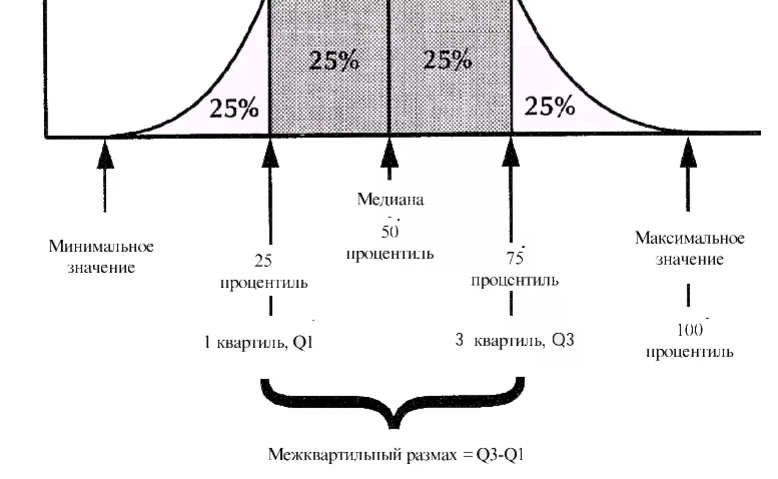 

Формула: 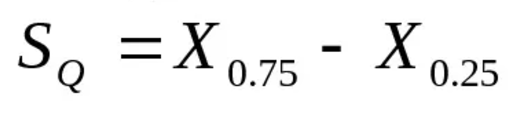

In [902]:
input_columns = [
    'Численность населения (тыс. чел.)',
    'Удельный вес городского населения %',
    'Изменение численности населения',
    'Число родившихся на 1000 населения.',
    'Число умерших на 1000 .',
    'Среднегодовая численность населения занятых в экономике  (тыс. чел.)',
    'Среднедушевые денежные доходы (руб./мес.)'
]
for column in input_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Коэффициент 1.5 основан на статистическом наблюдении, что для нормального распределения почти все данные 
    # находятся внутри этого диапазона: Диапазон [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] охватывает примерно 99.3% значений 
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [903]:
info_columns = ['Регион'] # данные, идентифицирующие объект
X = data[input_columns] # признаки, используемые для кластеризацииы

StandardScaler это метод предварительной обработки в scikit-learn, используемый для стандартизации функций путём удаления среднего значения и масштабирования до единичной дисперсии. Он преобразует распределение каждого признака так, чтобы оно имело среднее значение, равное нулю, и стандартное отклонение, равное единице. Этот процесс гарантирует, что все функции находятся в одном масштабе, не позволяя какой-либо отдельной функции доминировать в процессе обучения из-за её большей величины 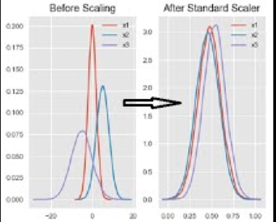

In [904]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Применим метод KMeans для кластеризации на 5 кластеров. Работа алгоритма K-means (метод k-средних): 
1) В начале работы алгоритма выбираются K случайных центров
2) Каждый объект выборки относят к тому кластеру, к центру которого объект оказался ближе
3) Далее центры кластеров подсчитывают как среднее арифметическое векторов признаков всех вошедших в этот кластер объектов (то есть центр масс кластера)
4) Центры кластеров обновляются
5) Объекты заново перераспределяются по кластерам, а затем можно снова уточнить положение центров
6) Процесс продолжается до тех пор, пока центры кластеров не перестанут меняться
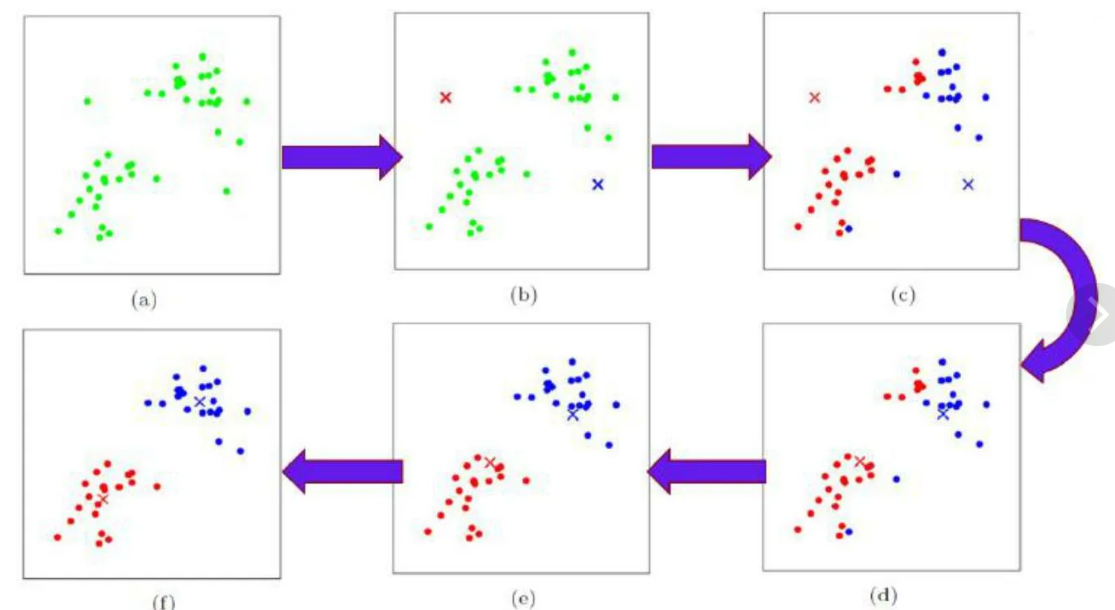

In [905]:
kmeans_5 = KMeans(n_clusters=5, random_state=42)
kmeans_5.fit(X_scaled)
data['Cluster_5'] = kmeans_5.labels_
data.head()

,Регион,Численность населения (тыс. чел.),Удельный вес городского населения %,Изменение численности населения,Число родившихся на 1000 населения.,Число умерших на 1000 .,Среднегодовая численность населения занятых в экономике (тыс. чел.),Среднедушевые денежные доходы (руб./мес.),Cluster_5
0,Республика Карелия,766,74.1,-0.8,7.9,15.1,331.5,1673.4,2
1,Республика Коми,1135,74.2,-1.3,8.5,10.7,495.3,1654.4,2
2,Архангельская область,1460,74.4,-1.3,8.1,15.1,587.8,2058.0,2
3,Ненецкий АО,46,59.2,-0.6,11.2,9.4,20.7,1268.8,4
4,Вологодская область,1324,68.4,-0.7,7.9,15.8,598.4,1692.1,2


In [906]:
from IPython.display import display
cluster_profiles = data.groupby('Cluster_5')[input_columns].mean() # mean вычисляет среднее значение для всех признаков в каждом кластере
print("Профили кластеров (5 кластеров):")
display(cluster_profiles)

Профили кластеров (5 кластеров):


,Численность населения (тыс. чел.),Удельный вес городского населения %,Изменение численности населения,Число родившихся на 1000 населения.,Число умерших на 1000 .,Среднегодовая численность населения занятых в экономике (тыс. чел.),Среднедушевые денежные доходы (руб./мес.)
Cluster_5,,,,,,,
0,3284.000000,75.735714,-0.417857,8.585714,14.150000,1446.142857,1177.185714
1,2031.142857,61.300000,-0.185714,8.728571,13.542857,872.328571,1016.214286
2,956.700000,75.160000,-1.130000,8.390000,12.560000,412.780000,1606.560000
3,1322.904762,69.547619,-0.871429,7.114286,17.828571,579.885714,1045.295238
4,738.333333,58.250000,-0.366667,10.033333,12.533333,289.175000,991.025000


С помощью этого можно проанализировать кластеры. Например, для нулевого кластера численность населения значительно выше, чем в других кластерах (3284 тыс. чел.). Удельный вес городского населения также выше (75.7%), что говорит о том, что большинство людей живет в городских районах. Среднедушевые доходы (1177 руб./мес.) выше, чем у некоторых других кластеров, но не являются максимальными. Среднегодовая численность занятых в экономике также самая высокая, что может указывать на развитую экономику

In [907]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(X_scaled)
data['Cluster_4'] = kmeans_4.labels_
data.head()

,Регион,Численность населения (тыс. чел.),Удельный вес городского населения %,Изменение численности населения,Число родившихся на 1000 населения.,Число умерших на 1000 .,Среднегодовая численность населения занятых в экономике (тыс. чел.),Среднедушевые денежные доходы (руб./мес.),Cluster_5,Cluster_4
0,Республика Карелия,766,74.1,-0.8,7.9,15.1,331.5,1673.4,2,2
1,Республика Коми,1135,74.2,-1.3,8.5,10.7,495.3,1654.4,2,2
2,Архангельская область,1460,74.4,-1.3,8.1,15.1,587.8,2058.0,2,2
3,Ненецкий АО,46,59.2,-0.6,11.2,9.4,20.7,1268.8,4,3
4,Вологодская область,1324,68.4,-0.7,7.9,15.8,598.4,1692.1,2,2


In [908]:
cluster_profiles_4 = data.groupby('Cluster_4')[input_columns].mean()
print("Профили кластеров (4 кластера):")
display(cluster_profiles_4)

Профили кластеров (4 кластера):


,Численность населения (тыс. чел.),Удельный вес городского населения %,Изменение численности населения,Число родившихся на 1000 населения.,Число умерших на 1000 .,Среднегодовая численность населения занятых в экономике (тыс. чел.),Среднедушевые денежные доходы (руб./мес.)
Cluster_4,,,,,,,
0,3240.090909,75.827273,-0.512727,8.290909,15.036364,1412.800000,1032.645455
1,2565.500000,65.630000,-0.191000,8.830000,13.150000,1131.470000,1249.310000
2,1208.571429,72.132143,-0.953571,7.382143,16.482143,526.825000,1200.603571
3,751.066667,59.360000,-0.460000,9.920000,12.326667,301.413333,1068.940000


Чтобы сравнить результаты для 4 и 5 кластеров, попробуем визуализировать их с использованием метода главных компонент (PCA) для понижения размерности данных и отображения их на двумерном графике

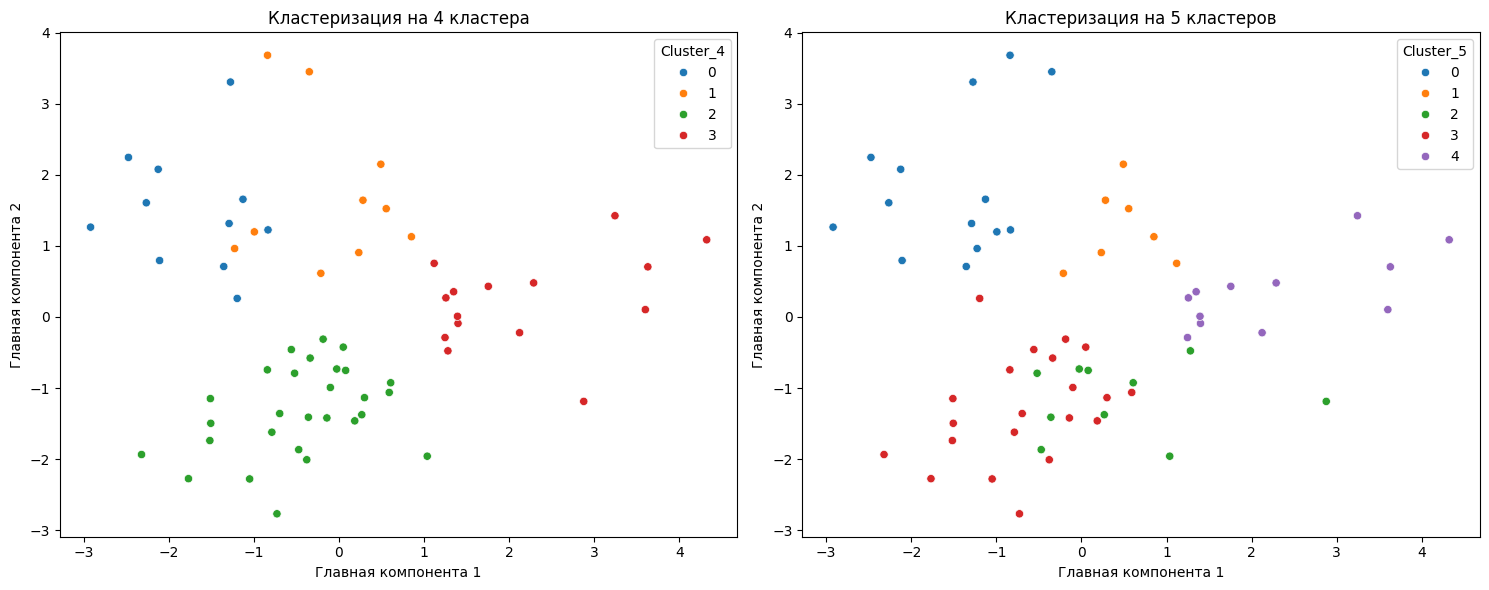

In [909]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(ax=axes[0], x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster_4'], palette='tab10')
axes[0].set_title('Кластеризация на 4 кластера')
axes[0].set_xlabel('Главная компонента 1')
axes[0].set_ylabel('Главная компонента 2')
sns.scatterplot(ax=axes[1], x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster_5'], palette='tab10')
axes[1].set_title('Кластеризация на 5 кластеров')
axes[1].set_xlabel('Главная компонента 1')
axes[1].set_ylabel('Главная компонента 2')
plt.tight_layout()
plt.show()

Видно, что 4 кластера в данном случае лучше, чем 5

Попробуем кластеризацию на несглаженных данных (без x_scaled), чтобы сравнить результаты кластеризации на масштабированных и несглаженных данных. Стандартизация данных часто помогает улучшить результаты кластеризации, так как все признаки приводятся к одному масштабу. Без стандартизации признаки с большими значениями могут доминировать и сильно влиять на результат. Сравнение кластеризации на масштабированных и исходных данных помогает понять, насколько важна была предварительная обработка данных и какой эффект она оказала на разделение объектов по кластерам

In [910]:
kmeans_unsmoothed = KMeans(n_clusters=4, random_state=42)
kmeans_unsmoothed.fit(X)
data['Cluster_Unsmoothed'] = kmeans_unsmoothed.labels_ 
data.head()

,Регион,Численность населения (тыс. чел.),Удельный вес городского населения %,Изменение численности населения,Число родившихся на 1000 населения.,Число умерших на 1000 .,Среднегодовая численность населения занятых в экономике (тыс. чел.),Среднедушевые денежные доходы (руб./мес.),Cluster_5,Cluster_4,Cluster_Unsmoothed
0,Республика Карелия,766,74.1,-0.8,7.9,15.1,331.5,1673.4,2,2,2
1,Республика Коми,1135,74.2,-1.3,8.5,10.7,495.3,1654.4,2,2,1
2,Архангельская область,1460,74.4,-1.3,8.1,15.1,587.8,2058.0,2,2,1
3,Ненецкий АО,46,59.2,-0.6,11.2,9.4,20.7,1268.8,4,3,2
4,Вологодская область,1324,68.4,-0.7,7.9,15.8,598.4,1692.1,2,2,1


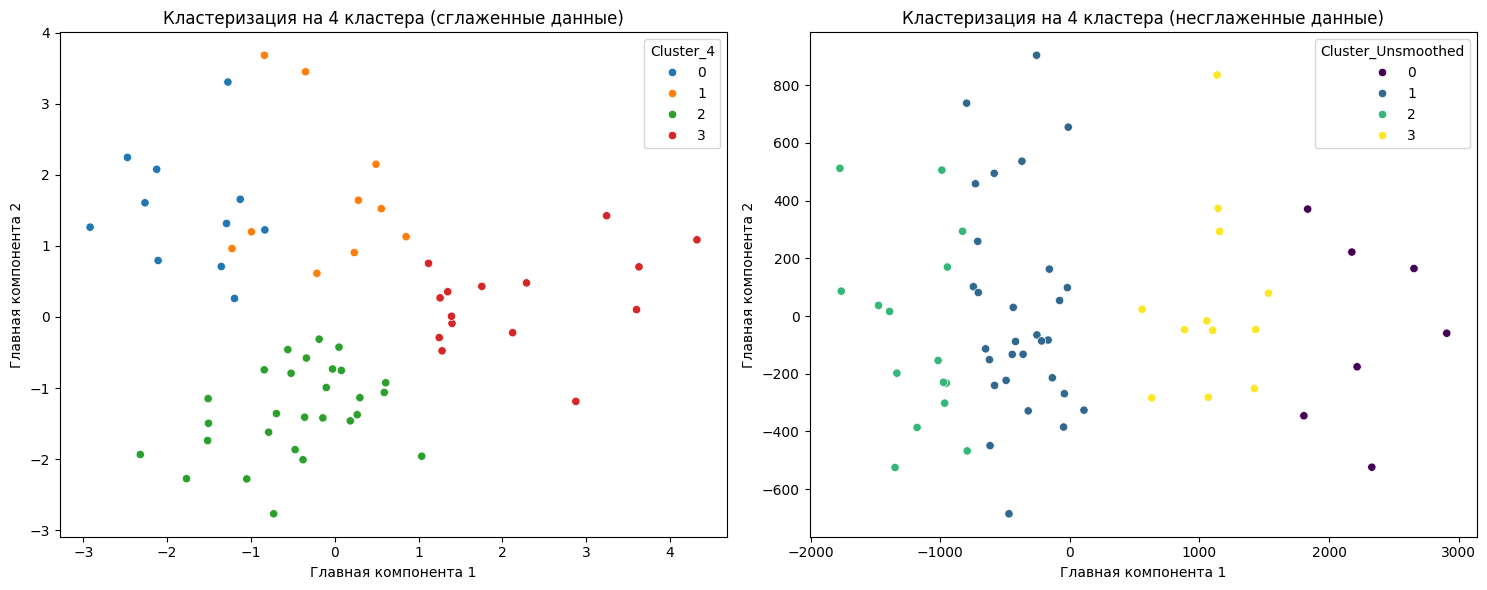

In [911]:
X_pca_unsmoothed = pca.fit_transform(X)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(ax=axes[0], x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster_4'], palette='tab10')
axes[0].set_title('Кластеризация на 4 кластера (сглаженные данные)')
axes[0].set_xlabel('Главная компонента 1')
axes[0].set_ylabel('Главная компонента 2')
sns.scatterplot(ax=axes[1], x=X_pca_unsmoothed[:, 0], y=X_pca_unsmoothed[:, 1], hue=data['Cluster_Unsmoothed'], palette='viridis')
axes[1].set_title('Кластеризация на 4 кластера (несглаженные данные)')
axes[1].set_xlabel('Главная компонента 1')
axes[1].set_ylabel('Главная компонента 2')

plt.tight_layout()
plt.show()

Вывод: масштабирование данных (стандартизация) перед кластеризацией значительно улучшает качество разделения объектов на кластеры. Это подтверждается тем, что на графике с сглаженными данными кластеры более четко выражены и имеют меньшее количество пересечений

## Карты Кохонена

In [912]:
data = pd.read_csv('Banks.txt', sep='\t', encoding="cp1251")
data.head()


,Номер,Банк,Рег. Номер,Реутеры,Филиалы,Город,Количество рабочих,Сумма активов,Собственные активы,Банковские активы,...,Привил. ресурсы,"Ссуда, руб.","Ссуда, долл.",Средства в Банке,Межфилиальные средства,Бюджет,Прибыль,Карты,Гос. облигации,Средства ДУ
0,2,Внешторгбанк,1000.0,-,32,Москва,3297,101660298,23236327,84343558,...,18053156,6588171,14842031,30863714,5919300,0,245820,348793,749356,0
1,3,Газпромбанк,354.0,GZPM,27,Москва,2559,79012789,9255041,74409960,...,10154247,8470823,31267375,18833125,4313630,0,355197,455520,123111,8316761
2,4,"ООО ""Международный Промышленный банк""",2056.0,TIBP,4,Москва,459,77888642,26409116,58647197,...,25093336,34043343,8405719,6712070,19195367,23917,306196,3255,38504,1662557
3,5,Международный Московский Банк,1.0,IMBX,1,Москва,621,63910966,1176462,62436148,...,3600147,462037,7797623,38973392,830525,0,0,178071,2033200,720
4,6,"ОАО ""АЛЬФА-БАНК""",1326.0,ALFM,17,Москва,2323,57510886,12446938,52348562,...,11527973,4987776,6077191,28996950,5104405,1594071,1218928,1012419,187085,0


In [913]:
input_columns = ['Филиалы', 'Сумма активов', 'Собственные активы', 'Банковские активы', 'Средства в Банке']
output_column = 'Прибыль'
X = data[input_columns]
y = data[output_column]

In [914]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Карта Кохонена (самоорганизующаяся карта, SOM) — это нейронная сеть с обучением без учителя, выполняющая задачу визуализации и кластеризации. Идея сети предложена финским учёным Т. Кохоненом. Карта Кохонена отображает данные большей размерности на карте меньшей размерности, состоящей из решётки нейронов. В процессе обучения векторы веса узлов приближаются к входным данным

Пример из жизни: "Представь, что у тебя есть набор фруктов, которые различаются по размеру, цвету и весу. Ты хочешь группировать их таким образом, чтобы похожие фрукты находились рядом друг с другом. Карта Кохонена работает как человек, который пробует все фрукты и решает, какие из них более похожи. Каждая клетка на карте — это группа фруктов, которые похожи друг на друга"

In [915]:
from minisom import MiniSom
# Создание и обучение карты Кохонена
# Настраиваем SOM
som_shape = (4, 4)  # Размер карты Кохонена
'''
Создаем сетку размером 4 на 4. Это означает, что у нас будет 16 нейронов (или клеток) в карте Кохонена, 
и каждый из них может представлять группу (кластер) похожих данных
'''
som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=X.shape[1], sigma=1.0, learning_rate=0.5)
# Инициализируем веса
som.random_weights_init(X_scaled)
'''
random_weights_init(X_scaled): Здесь SOM инициализирует свои веса случайными значениями, взятыми из данных X_scaled. 
Веса — это внутренние параметры нейронов, с которыми они сравнивают поступающие данные. Инициализация весов с использованием 
случайных значений помогает карте начать с неопределенного состояния и затем обучаться на основе данных.
'''
# Обучаем SOM
som.train_random(data=X_scaled, num_iteration=100)

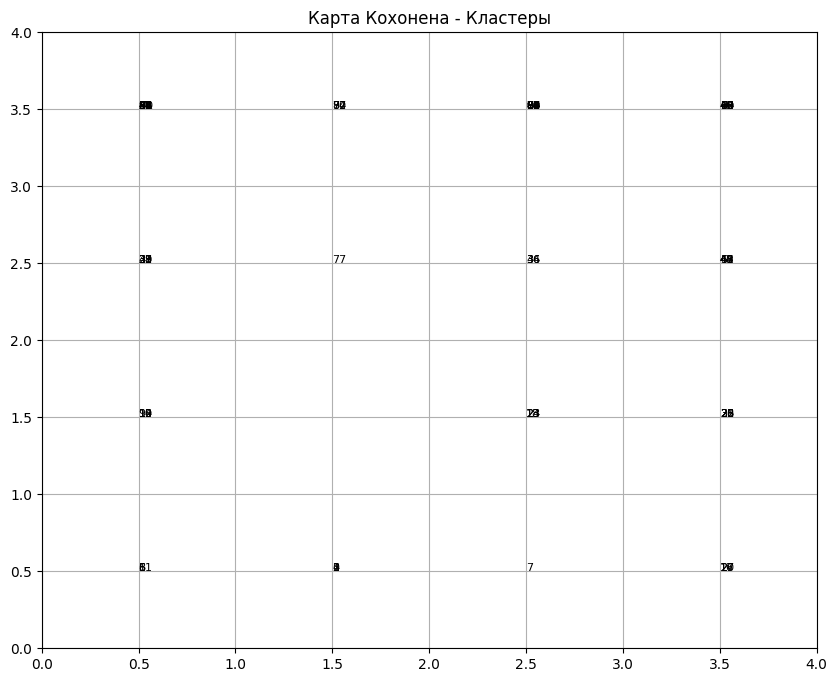

In [916]:
plt.figure(figsize=(10, 8))
for i, x in enumerate(X_scaled):
    winner = som.winner(x)  # Координаты победившего нейрона
    # Победивший нейрон — это тот нейрон на карте, который наиболее "похож" на данный элемент
    # Наример: Мы пробегаемся по всем банкам и выясняем, в какой клетке им "удобнее" находиться — это и называется победившим нейроном.
    plt.text(winner[0] + 0.5, winner[1] + 0.5, str(i), color='black', fontsize=8)
    # подписываем каждую клетку, где оказался банк, его индексом (номером), чтобы мы могли знать, какой банк куда попал

plt.xlim([0, som_shape[0]])
plt.ylim([0, som_shape[1]])
plt.title('Карта Кохонена - Кластеры')
plt.grid()
plt.show()

Описание графика: Сетка имеет 4 клетки по горизонтали и 4 клетки по вертикали, что соответствует размеру карты Кохонена (4 на 4). Это означает, что всего на карте 16 клеток, каждая из которых представляет собой нейрон, который может стать "победителем" для одной или нескольких точек данных. Каждая цифра внутри клетки — это индекс (номер) строки в исходном наборе данных. Например, если в клетке написано "10" и "20", что означает, что данные с индексами 10 и 20 попали в эту клетку, потому что они оказались "похожими" на основе критериев, по которым обучалась карта Кохонена. Каждая клетка, в которую попали элементы, можно считать кластером. Таким образом, элементы данных, которые оказались в одной и той же клетке, имеют схожие характеристики. На графике можно увидеть, что неравномерное распределение: некоторые клетки имеют больше элементов, чем другие, а многие клетки пустые. Это указывает на то, что данные сгруппировались в относительно небольшое количество кластеров

Создадим пустой словарь под названием clusters. Этот словарь будет использоваться для хранения информации о кластерах. Каждый ключ в словаре будет соответствовать координатам клетки на карте Кохонена, а значения — списку индексов элементов, которые принадлежат этому кластеру.

In [917]:
clusters = {}
for i, x in enumerate(X_scaled):
    winner = som.winner(x)
    if winner not in clusters:
        clusters[winner] = []
    clusters[winner].append(i)

Теперь проанализируем кластеры

In [918]:
for cluster, indices in clusters.items():
    print(f"Кластер {cluster}: Количество банков: {len(indices)}")
min_cluster = min(clusters, key=lambda x: len(clusters[x]))
max_cluster = max(clusters, key=lambda x: len(clusters[x]))

print("\nАнализ меньшего кластера:")
display(data.iloc[clusters[min_cluster]].head(3))

print("\nАнализ большего кластера:")
display(data.iloc[clusters[max_cluster]].head(3))

Кластер (np.int64(1), np.int64(0)): Количество банков: 5
Кластер (np.int64(0), np.int64(0)): Количество банков: 4
Кластер (np.int64(2), np.int64(0)): Количество банков: 1
Кластер (np.int64(0), np.int64(1)): Количество банков: 6
Кластер (np.int64(2), np.int64(1)): Количество банков: 4
Кластер (np.int64(3), np.int64(0)): Количество банков: 4
Кластер (np.int64(3), np.int64(1)): Количество банков: 7
Кластер (np.int64(0), np.int64(2)): Количество банков: 8
Кластер (np.int64(2), np.int64(2)): Количество банков: 3
Кластер (np.int64(3), np.int64(3)): Количество банков: 9
Кластер (np.int64(0), np.int64(3)): Количество банков: 17
Кластер (np.int64(3), np.int64(2)): Количество банков: 6
Кластер (np.int64(2), np.int64(3)): Количество банков: 20
Кластер (np.int64(1), np.int64(3)): Количество банков: 4
Кластер (np.int64(1), np.int64(2)): Количество банков: 1

Анализ меньшего кластера:


,Номер,Банк,Рег. Номер,Реутеры,Филиалы,Город,Количество рабочих,Сумма активов,Собственные активы,Банковские активы,...,Привил. ресурсы,"Ссуда, руб.","Ссуда, долл.",Средства в Банке,Межфилиальные средства,Бюджет,Прибыль,Карты,Гос. облигации,Средства ДУ
7,9,"АКБ ""РОСБАНК"" (ОАО)",2272.0,-,13,Москва,989,28105202,4691449,25807591,...,2460042,6691829,5882163,8848426,1479585,607332,257710,134021,774727,0



Анализ большего кластера:


,Номер,Банк,Рег. Номер,Реутеры,Филиалы,Город,Количество рабочих,Сумма активов,Собственные активы,Банковские активы,...,Привил. ресурсы,"Ссуда, руб.","Ссуда, долл.",Средства в Банке,Межфилиальные средства,Бюджет,Прибыль,Карты,Гос. облигации,Средства ДУ
57,59,"АКБ ""Металлинвестбанк""",2440.0,MEIN,2,Москва,272,2649453,408386,2007521,...,660389,1324444,212791,494121,22252,0,13807,4563,6618,47
61,63,Уралвнешторгбанк,1522.0,-,0,Екатеринбург,488,2573907,117258,2073443,...,339257,368038,199325,417488,0,20799,75944,617327,0,0
64,66,Промторгбанк,1961.0,TOPR,4,Москва,262,2555697,354812,2364194,...,60979,1135171,115159,386095,10083,0,7592,17646,20254,553262


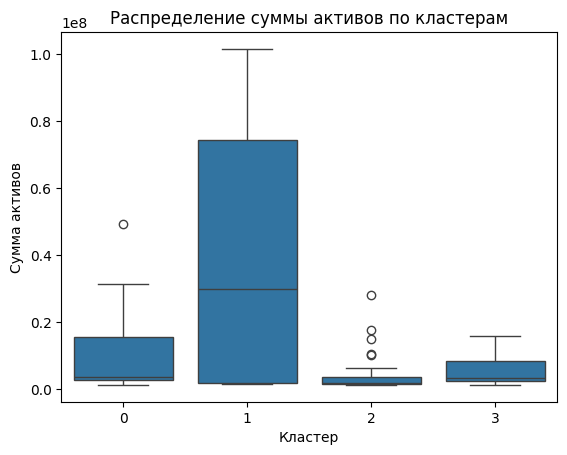

In [919]:
sns.boxplot(x=[som.winner(x)[0] for x in X_scaled], y=data['Сумма активов'])
plt.title('Распределение суммы активов по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Сумма активов')
plt.show()

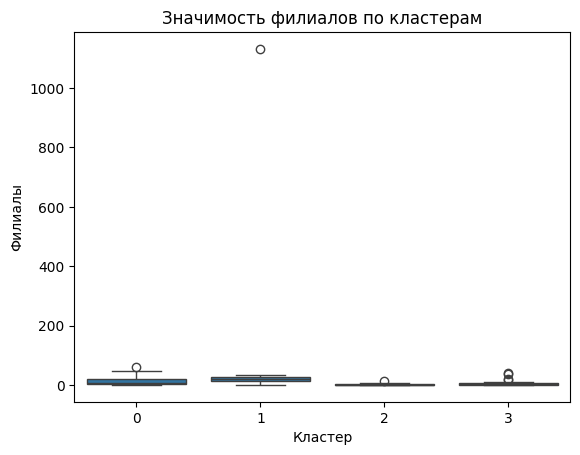

In [920]:
sns.boxplot(x=[som.winner(x)[0] for x in X_scaled], y=data['Филиалы'])
plt.title('Значимость филиалов по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Филиалы')
plt.show()

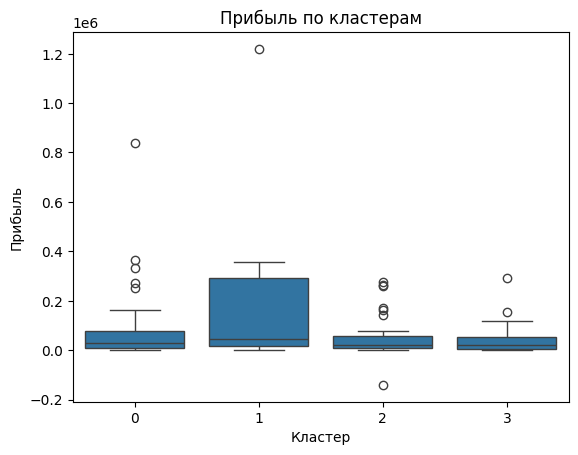

In [921]:
sns.boxplot(x=[som.winner(x)[0] for x in X_scaled], y=data['Прибыль'])
plt.title('Прибыль по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Прибыль')
plt.show()